In [75]:
import pandas as pd
import numpy as np
import os
from os import getcwd
import matplotlib.pyplot as plt

import csv
import string

import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [76]:
punc = string.punctuation
stopwords = [ "a", "about", "above", "after", "again", "against", "all", "am", "an", "and", "any", "are", "as", "at", "be", "because", "been", "before", "being", "below", "between", "both", "but", "by", "could", "did", "do", "does", "doing", "down", "during", "each", "few", "for", "from", "further", "had", "has", "have", "having", "he", "he'd", "he'll", "he's", "her", "here", "here's", "hers", "herself", "him", "himself", "his", "how", "how's", "i", "i'd", "i'll", "i'm", "i've", "if", "in", "into", "is", "it", "it's", "its", "itself", "let's", "me", "more", "most", "my", "myself", "nor", "of", "on", "once", "only", "or", "other", "ought", "our", "ours", "ourselves", "out", "over", "own", "same", "she", "she'd", "she'll", "she's", "should", "so", "some", "such", "than", "that", "that's", "the", "their", "theirs", "them", "themselves", "then", "there", "there's", "these", "they", "they'd", "they'll", "they're", "they've", "this", "those", "through", "to", "too", "under", "until", "up", "very", "was", "we", "we'd", "we'll", "we're", "we've", "were", "what", "what's", "when", "when's", "where", "where's", "which", "while", "who", "who's", "whom", "why", "why's", "with", "would", "you", "you'd", "you'll", "you're", "you've", "your", "yours", "yourself", "yourselves" ]

In [89]:
with open(getcwd()+"\\tweet_dataset.csv", "r") as file:
    labels = []
    data = []
    
    csv_reader = csv.reader(file)
    next(csv_reader)
    
    for row in csv_reader:
        
        if row[6] != '':
            labels.append(row[6])
            sentence = row[3]
        
            for char in punc:
                sentence = sentence.replace(char, " ")

            for word in stopwords:
                sentence = sentence.replace(" " + word + " ", " ")

            sentence = sentence.replace("  ", " ")
            
            # some examples with 3+ spaces grouped together
            sentence = sentence.replace("  ", " ")

            data.append(sentence)

In [90]:
labels[:3], len(labels)

(['negative', 'negative', 'positive'], 31395)

In [91]:
data[0], len(data)

('Layin n bed headache ughhhh waitin call ', 31395)

In [93]:
sen_lens = []

for row in data:
    sen_len = 0
    
    for word in row:
        sen_len = sen_len + 1
    
    sen_lens.append(sen_len)

(array([2203., 5856., 6332., 5401., 4348., 3829., 2409.,  904.,  106.,
           7.]),
 array([  0. ,  14.2,  28.4,  42.6,  56.8,  71. ,  85.2,  99.4, 113.6,
        127.8, 142. ]),
 <a list of 10 Patch objects>)

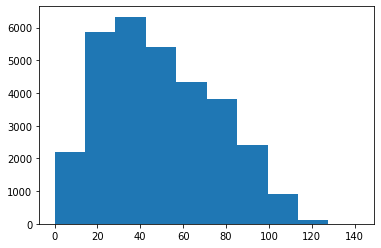

In [94]:
plt.hist(sen_lens)

In [95]:
max_len_cntr = max(sen_lens)
max_len_cntr

142

In [99]:
unique_words = []

for row in data:
    
    for word in row.split(" "):
        if word not in unique_words:
            unique_words.append(word)

In [100]:
len(unique_words)

34888

In [96]:
TRAIN_SPLIT = int(len(data) * 0.8)

In [97]:
x_train = data[:TRAIN_SPLIT]
x_val = data[TRAIN_SPLIT:]

y_train = labels[:TRAIN_SPLIT]
y_val = labels[TRAIN_SPLIT:]

len(x_train), len(x_val)

(25116, 6279)

In [101]:
vocab_size = 35000
oov_tok = "<OOV>"
padding_type = 'post'
trunc_type = 'post'
max_len = max_len_cntr

tokenizer = Tokenizer(num_words = vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(x_train)
word_index = tokenizer.word_index

x_train_seq = tokenizer.texts_to_sequences(x_train)
x_train_pad = pad_sequences(x_train_seq, padding=padding_type, maxlen=max_len)

In [102]:
x_train_pad[0]

array([6649,  221,  103,  351, 2939, 1710,  246,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0])

In [103]:
x_val_seq = tokenizer.texts_to_sequences(x_val)
x_val_pad = pad_sequences(x_val_seq, padding=padding_type, maxlen=max_len)

In [104]:
x_train_pad.shape, x_val_pad.shape

((25116, 142), (6279, 142))

In [105]:
tokenizer_label = Tokenizer()
tokenizer_label.fit_on_texts(y_train)

y_train_seq = np.array(tokenizer_label.texts_to_sequences(y_train))
y_val_seq = np.array(tokenizer_label.texts_to_sequences(y_val))

In [106]:
y_train_seq.shape, y_val_seq.shape

((25116, 1), (6279, 1))

In [107]:
pd.unique(pd.DataFrame(labels)[0])

array(['negative', 'positive', 'neutral'], dtype=object)

In [108]:
y_train_seq

array([[2],
       [2],
       [3],
       ...,
       [1],
       [1],
       [1]])

In [110]:
embedding_dim = 64
num_epochs = 10

# model = tf.keras.Sequential([
#     tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_len),
#     tf.keras.layers.Dropout(0.2),
#     tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64)),
#     tf.keras.layers.Dense(32, activation='relu'),
#     tf.keras.layers.Dropout(0.2),
#     tf.keras.layers.Dense(4, activation='softmax')
# ])

model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_len),
    tf.keras.layers.Conv1D(128, 5, activation='relu'),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(32, activation='relu'),
#     tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(4, activation='softmax')
])

model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['acc'])
# model.summary()

history = model.fit(x_train_pad, y_train_seq, epochs=num_epochs, 
                    validation_data=(x_val_pad, y_val_seq), verbose=2)

Train on 25116 samples, validate on 6279 samples
Epoch 1/10
25116/25116 - 40s - loss: 0.9389 - acc: 0.5324 - val_loss: 0.7464 - val_acc: 0.7073
Epoch 2/10
25116/25116 - 41s - loss: 0.6739 - acc: 0.7215 - val_loss: 0.6264 - val_acc: 0.7678
Epoch 3/10
25116/25116 - 41s - loss: 0.5401 - acc: 0.7940 - val_loss: 0.6868 - val_acc: 0.7439
Epoch 4/10
25116/25116 - 41s - loss: 0.4431 - acc: 0.8438 - val_loss: 0.6922 - val_acc: 0.7522
Epoch 5/10
25116/25116 - 41s - loss: 0.3638 - acc: 0.8759 - val_loss: 0.7312 - val_acc: 0.7568
Epoch 6/10
25116/25116 - 41s - loss: 0.3034 - acc: 0.9010 - val_loss: 0.7895 - val_acc: 0.7469
Epoch 7/10
25116/25116 - 42s - loss: 0.2525 - acc: 0.9202 - val_loss: 0.8676 - val_acc: 0.7363
Epoch 8/10
25116/25116 - 41s - loss: 0.2124 - acc: 0.9350 - val_loss: 0.9394 - val_acc: 0.7313
Epoch 9/10
25116/25116 - 42s - loss: 0.1794 - acc: 0.9455 - val_loss: 1.0448 - val_acc: 0.7149
Epoch 10/10
25116/25116 - 41s - loss: 0.1532 - acc: 0.9529 - val_loss: 1.0971 - val_acc: 0.7154


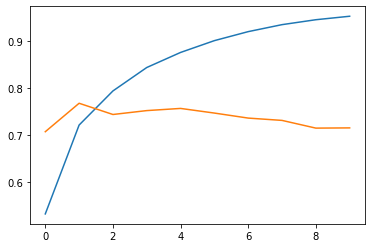

In [111]:
%matplotlib inline

plt.plot(range(num_epochs), history.history['acc'])
plt.plot(range(num_epochs), history.history['val_acc'])

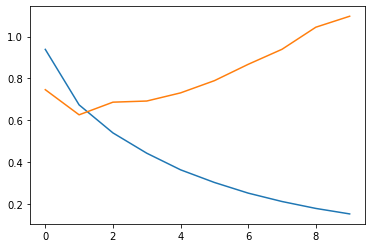

In [112]:
plt.plot(range(num_epochs), history.history['loss'])
plt.plot(range(num_epochs), history.history['val_loss'])

In [113]:
preds = model.predict_classes(x_val_pad)

In [116]:
for i in range(10):
    print(preds[i], y_val_seq[i])

3 [1]
3 [3]
1 [3]
1 [1]
1 [1]
1 [1]
2 [1]
3 [1]
1 [3]
3 [1]


In [117]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [119]:
print(classification_report(y_val_seq, preds))

              precision    recall  f1-score   support

           1       0.66      0.66      0.66      2416
           2       0.32      0.45      0.38       442
           3       0.83      0.79      0.81      3421

    accuracy                           0.72      6279
   macro avg       0.61      0.63      0.62      6279
weighted avg       0.73      0.72      0.72      6279



In [120]:
print(confusion_matrix(y_val_seq, preds))

[[1595  308  513]
 [ 187  199   56]
 [ 617  106 2698]]
